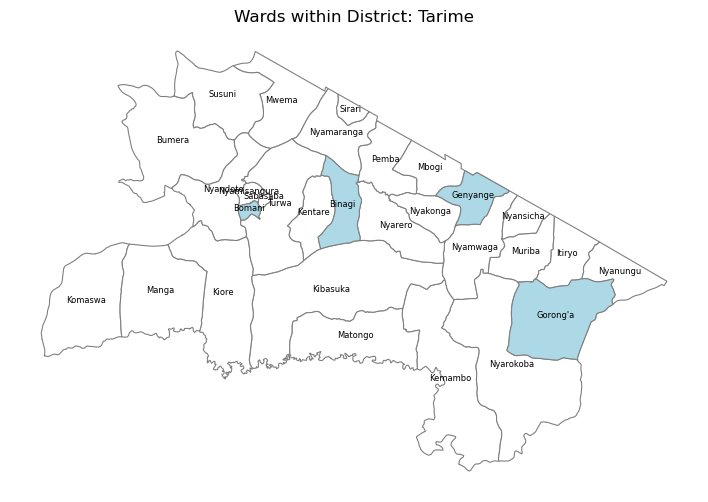

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Load shapefiles
wards = gpd.read_file("Maps/TZAmap_wards.shp")
districts = gpd.read_file("Maps/TZAmap_districts.shp")

# Select a district (e.g., "Tarime")
selected_district = districts[districts["shapeName"] == "Tarime"]

# Create centroids for each ward
wards["centroid"] = wards.geometry.centroid

# Check if each ward's centroid is within the selected district
wards_in_district = wards[wards["centroid"].within(selected_district.geometry.iloc[0])]

# Define the districts that you want to change the color fill of 
highlight_wards = ["Binagi", "Bomani", "Genyange", "Gorong'a"]

# Filter the wards that you want to change the fill of 
highlight_wards = wards[wards["shapeName"].isin(highlight_wards)]


# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the filtered wards within the selected district
wards_in_district.plot(ax=ax, edgecolor="grey", linewidth=0.8, color="white")

# Plot the filtered wards within the selected district
highlight_wards.plot(ax=ax, edgecolor="grey", linewidth=0.8, color="lightblue")

# plot the selected district's boundary
# selected_district.plot(ax=ax, edgecolor="red", linewidth=1, facecolor="none")

# Label each ward by plotting the ward name at the center of each ward
for idx, row in wards_in_district.iterrows():
    # Get the centroid of each ward
    centroid = row["centroid"]
    # Add the ward name at the centroid's coordinates
    ax.text(centroid.x, centroid.y, row["shapeName"], fontsize=6, ha="center", color="black")

# Remove the axis
plt.axis("off")

# Label graph
plt.title("Wards in Tarime")

# Show the plot
plt.show()